In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import matplotlib.patches as mpatches
import seaborn as sns
sns.set()
from matplotlib import style
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline
# plt.style.use('fivethirtyeight')
#plt.style.use(['ggplot'])
%config IPCompleter.greedy=True
#plt.style.use(['dark_background'])
plt.style.use('seaborn-dark')
#import json

In [2]:
df = pd.read_csv('youtube_countries.csv', index_col=0, keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)

df

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,114631.0,1.976452e+01,7.379845e+00,1.0,17.0,23.0,24.0,44.0
views,114631.0,1.927390e+06,9.274970e+06,518.0,95791.5,335451.0,1096384.0,424538912.0
likes,114631.0,5.360442e+04,1.845433e+05,0.0,1773.0,8669.0,32162.0,4737873.0
dislikes,114631.0,3.257462e+03,3.573472e+04,0.0,80.0,307.0,1168.0,1944971.0
comment_count,114631.0,6.135880e+03,3.118556e+04,0.0,267.0,1047.0,3646.0,1626501.0


In [5]:
df.corr()

,id,views,likes,dislikes,comment_count
id,1.000000,-0.133770,-0.159816,-0.015738,-0.050381
views,-0.133770,1.000000,0.760242,0.369332,0.429951
likes,-0.159816,0.760242,1.000000,0.441399,0.702833
dislikes,-0.015738,0.369332,0.441399,1.000000,0.817677
comment_count,-0.050381,0.429951,0.702833,0.817677,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1603c358>]],
      dtype=object)

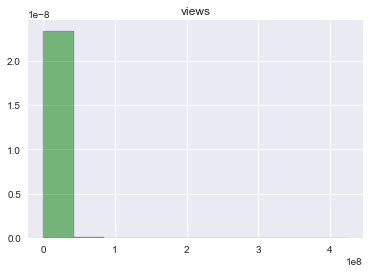

In [6]:
df.hist(column='views', bins=10, normed=True, alpha=0.5,
          color='green',
         edgecolor='blue')

In [7]:
df['views'].min()

518.0

In [8]:
df['views'].max()

424538912.0

In [9]:
#Equal frequency binning of views
views_bins = pd.qcut(df["views"], 20, retbins=True, labels=False)

views_bins

In [12]:
df.drop(['views'],axis=1,inplace=True)

df

In [14]:
df.fillna(0, inplace=True)

#concatenate series onto dataset
df_viewsenc = pd.concat([df,views_bins],axis=1)

df_viewsenc

In [ ]:
#Create dummy encoding variables for comments_disabled, ratings_disabled, video_error_or_removed

In [ ]:
#Multiply data set by 1 to get boolean values to 1 and 0's
df_viewsenc * 1

In [ ]:
df_viewsenc.hist(column='views',bins=20, normed=True, alpha=0.5,
          color='green',
         edgecolor='blue')

### Correlation matrix

In [ ]:
#Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")
#select continous features
corr = df_viewsenc.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

#### Convert all NaN to 0 

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
#convert categorical/genre values to numeric
df_viewsenc["Genre"] = df_viewsenc["Genre"].astype('category')
df_viewsenc.dtypes

In [ ]:
#Category rename 
#Encode Genre category as variables and concatenate it to dataframe
df_viewsenc["Genre_cat"] = df_viewsenc["Genre"].cat.codes
df_viewsenc.head()

### Simple Linear regression 

In [ ]:
#Import statsmodels package for training a linear regression model.
import statsmodels.formula.api as sm

# The formula specifies the target feature and the descriptive features used for training the 
# linear regression model.
# We first train a simple linear regression with only one descriptive feature (Size).
# For training the model we call the method fit() on the given data stored in our df dataframe.
lm = sm.ols(formula="views ~ likes + dislikes + comment_count + comments_disabled + ratings_disabled + video_error_or_removed", data=df_viewsenc).fit()

# Print the model weights/parameters
print(lm.params)

In [ ]:
print(lm.summary())

In [ ]:
df_viewsenc.plot(kind='scatter', x='likes', y='views', label="%.3f" % df_viewsenc[['likes', 'views']].corr().as_matrix()[0,1])
df_viewsenc.plot(kind='scatter', x='dislikes', y='views', label="%.3f" % df_viewsenc[['dislikes', 'views']].corr().as_matrix()[0,1])
df_viewsenc.plot(kind='scatter', x='comment_count', y='views', label="%.3f" % df_viewsenc[['comment_count', 'views']].corr().as_matrix()[0,1])

### Split dataset into test and training

In [ ]:
#Make df_X (all features except target feature- views)
df_X = df_viewsenc.drop(['views'])
#Make df_y (only target feature- views)
df_y = df_viewsenc['views']

In [ ]:
df_X.isnull().values.any()

In [ ]:
df_y.isnull().values.any()

In [ ]:
#Convert NaN values in df_X to 0
#df_X.fillna(np.NaN, 0)
df_X.fillna(0, inplace=True)
df_y.fillna(0, inplace=True)

In [ ]:
df_X.isnull().values.any()

In [ ]:
df_y.isnull().values.any()

In [ ]:
#Randomly splitting into test and training -- random_state = 400 (setting seed for split function)
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df_X, df_y, test_size = 0.3, random_state = 400)

### Modelling and prediction

The following are the datasets for our training and testing pupose:

**Training Dataset**
1. df_X_train
2. df_y_train

**Testing Dataset**
1. df_X_test
2. df_y_test

In [ ]:
# Importing statsmodels to work our linear regression on the training set
import statsmodels.api as sm

#### Creating training set

In [ ]:
# Creating a new training and test sets with only the required columns in them
df_X_train_new = df_X_train[['views','likes','dislikes','comment_count','comments_disabled','ratings_disabled','video_error_or_removed','Genre_cat']]
df_X_test_new = df_X_test[['views','likes','dislikes','comment_count','comments_disabled','ratings_disabled','video_error_or_removed','Genre_cat']]

In [ ]:
#Create dataframe with only continuous features
df_X_train_cont = df_X_train_new[['views','likes','dislikes','comment_count']]

# Step 2: Create dummies for each of the ctegorical features
genre_dummies = pd.get_dummies(df_X_train.Genre, prefix='Genre_group')
comments_disabled_dummies = pd.get_dummies(df_X_train.comments_disabled, prefix='comments_disabled_Group')
ratings_disabled_dummies = pd.get_dummies(df_X_train.ratings_disabled, prefix='ratings_disabled_Group')
video_error_or_removed_dummies = pd.get_dummies(df_X_train.video_error_or_removed, prefix='video_error_or_removed_Group')

# Step 3: Concatenate all the dummies series with the continuous features dataframe
X_train_final = pd.concat([df_X_train_cont,genre_dummies,comments_disabled_dummies,ratings_disabled_dummies,video_error_or_removed_dummies], axis=1)
# X_train_final = pd.concat([age_dummies,handsetAge_dummies,lifeTime_dummies,numHandsets_dummies,smartPhone_dummies], axis=1)
X_train_final

In [ ]:
#X_train_final.fillna(0, inplace=True)

In [ ]:
X_train_final

In [ ]:
X_train_st

In [ ]:
#Standardisation
X_train_st = (X_train_final - X_train_final.mean()) / X_train_final.std()

In [ ]:
X_train_st

###  Linear Regression

**Training and Evaluation <font color="purple">Training Set</font>**

In [ ]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train_st, df_y_train)

In [ ]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

In [ ]:
# pair the feature names with the coefficients
list(zip(X_train_st, linreg.coef_))

In [ ]:
#Training our model to learn from these descriptive features
X = sm.add_constant(X_train_st)
model = sm.OLS(df_y_train, X).fit()
print(model.params)

#### Interpretation of the model

In [ ]:
print(lm.rsquared)

In [ ]:
print(model.summary())

### Feature selection

### Dummy encoding for categorical variables

### Linear regression in scikit-learn

In [ ]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

### Interpreting the model coefficients

In [ ]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

In [ ]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

A unit increase in views is associated with a 1.0000000000000004 unit increase in likes,

dislikes associated with 1.914951674617251e-16 increase in views. 

For every unit decrease in comment_count is associated with -2.441659 decrease in views

#### Making predictions

In [ ]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

### Model evaluation metrics for regression

In [ ]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

In [ ]:
# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

In [ ]:
# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

In [ ]:
# calculate RMSE by hand
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))


### Computing RMSE for sales predictions

In [ ]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

likes, dislikes, comment_count
MSE = 5.55037271481e-16

MSE after dropping comment_count: 
MSE = 5.55037271481e-16

### Feature selection

Removing comment_count from model and see does te quality of prediction improve

In [ ]:
df_st['dislikes']

#### Removing comment_count from features to see if MSE changes

In [ ]:
# create a Python list of feature names
feature_cols = df_st.drop(['views','comment_count'])

# use the list to select a subset of the original DataFrame
X = feature_cols

# select a Series from the DataFrame
y = df_st['views']

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

### Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

features = np.array(['views','likes','dislikes','comment_count'])
clf = RandomForestClassifier()
clf.fit(df[features], df['views'])

In [ ]:
# from the calculated importances, order them from most to least important
# and make a barplot so we can visualize what is/isn't important
importances = clf.feature_importances_
sorted_idx = np.argsort(importances)

In [ ]:
padding = np.arange(len(features)) + 0.5
plt.barh(padding, importances[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

In [ ]:
features = df[['views','likes','dislikes','comment_count','Genre','comments_disabled','ratings_disabled','video_error_or_removed']]